# Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydot
import graphviz

### EXEMPLO1: Iris Dataset
No exemplo a seguir utiizaremos o Iris Dataset, disponível internamente no próprio Scikit Learn. 

**Trabalhando os dados**

In [2]:
# Importando o DataSet do scikit learn
from sklearn.datasets import load_iris

iris = load_iris()

# Dividindo entre feature e target
X = iris.data[:, 2:]  # Vamos utilizar somente as colunas: petal length e petal width
y = iris.target

**Treinando o modelo**

In [3]:
# Classificando com o decision tree
tree_iris = DecisionTreeClassifier(max_depth=2)
tree_iris.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Verificando a acurácia**

In [4]:
tree_iris.score(X, y)

0.96

**Gerando o arquivo de visualização**

In [5]:
# Definindo o caminho/nome do arquivo .dot
arquivo = "figuras/iris_tree.dot"

# Instanciando o nome das features
labels = iris.feature_names[2:]

# Exportando o arquivo .dot
export_graphviz(
    tree_iris,
    out_file=arquivo,
    feature_names=labels,
    class_names=iris.target_names,
    rounded=True,
    filled=True)

**Visualizando a Decision Tree**

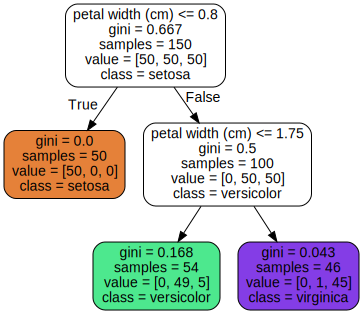

In [6]:
# Visualizando o arquivo .dot
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**Executando a predição**  
A partir do modelo treinado, podemos executar predições. No exemplo abaixo, solicitamos ao modelo que classifique a partir dos valores de petal length=5 e petal width=1.5, e ele nos trouxe o valor 1, correspondente à versicolor.

In [7]:
# Imprimindo os nomes dos targets:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
# Criando um novo dado
newFlower = [5, 1.5]

# Executando a predição:
tree_iris.predict([newFlower])

array([1])

**Verificando as probabilidades**  
Para entender a tomada de decisão do modelo na hora de classificar, podemos verificar as probabilidades atribuídas por ele para cada possível target. Usandos os mesmos valores do exemplo anterior, podemos ver abaixoqu o modelo atribuiu 0% para setosa, 90% para versicolor e 9% para virgínica:

In [9]:
tree_iris.predict_proba([newFlower])

array([[0.        , 0.90740741, 0.09259259]])

### EXEMPLO2: Breast Cancer Dataset

**Trabalhando os dados**

In [10]:
# Importando o dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# Dividindo entre feature e target; treino e teste
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

**Treinando o modelo**  
Foi rodado um modelo sem limite de profundidade (max_depth=None), porém foi verificado que ao limitar a profundidade à 3, o modelo atingiu uma melhor acurácia nos dados de teste.

In [11]:
tree_cancer = DecisionTreeClassifier(max_depth=3)

tree_cancer.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Verificando a acurácia**

In [12]:
tree_cancer.score(X_train, y_train)

0.9671361502347418

In [13]:
tree_cancer.score(X_test, y_test)

0.958041958041958

**Gerando o arquivo de visualização**

In [14]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = 'figuras/tree_cancer.dot'

export_graphviz(tree_cancer,
                out_file=arquivo,
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

# Convertendo o arquivo .dot para .png
!dot -Tpng figuras/tree_cancer.dot -o figuras/tree_cancer.png

**Visualizando a Decision Tree**

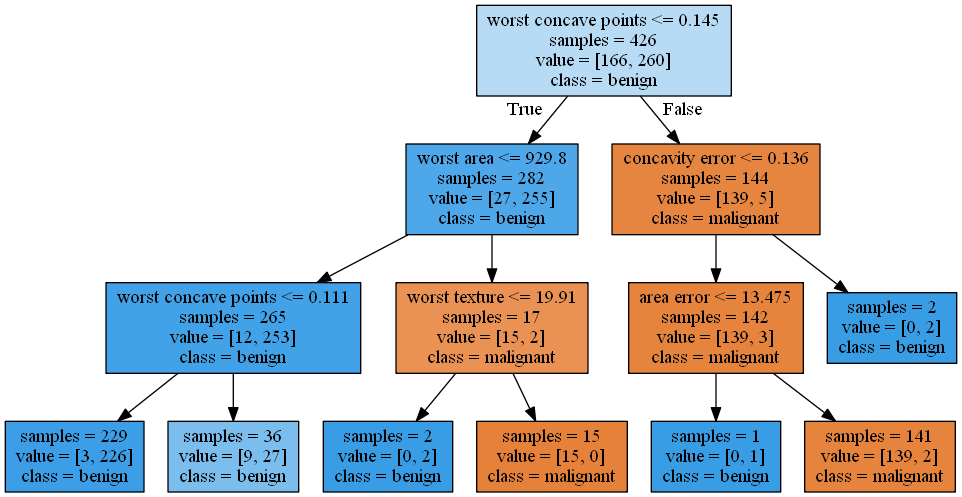

In [15]:
from IPython.display import Image
Image("figuras/tree_cancer.png")

**Importância dos Atributos**  
Podemos verificar a quais atributos foi dado o maior peso na classificação, utilizando o ``feature_importances_``. 

In [16]:
# Atribuindo os valores às variáveis
featuresC = cancer.feature_names
importancesC = tree_cancer.feature_importances_

# Verificando o tamanho e o tipo das variáveis
print(featuresC.dtype, featuresC.size), print(importancesC.dtype, importancesC.size);

<U23 30
float64 30


In [17]:
# Criando uma estrutura vazia, com o tamanho e tipo dos dados que serão preenchidos
importancia = np.zeros(30, dtype=[('features', '<U23'), ('importances', 'float64')])

In [18]:
# Preenchendo os valores
importancia['features'] = featuresC
importancia['importances'] = importancesC

# Imprimindo os atributos e o percentual de importância dado pelo algoritmo
print(importancia)

[('mean radius', 0.        ) ('mean texture', 0.        )
 ('mean perimeter', 0.        ) ('mean area', 0.        )
 ('mean smoothness', 0.        ) ('mean compactness', 0.        )
 ('mean concavity', 0.        ) ('mean concave points', 0.        )
 ('mean symmetry', 0.        ) ('mean fractal dimension', 0.        )
 ('radius error', 0.        ) ('texture error', 0.        )
 ('perimeter error', 0.        ) ('area error', 0.01076609)
 ('smoothness error', 0.        ) ('compactness error', 0.        )
 ('concavity error', 0.02108359) ('concave points error', 0.        )
 ('symmetry error', 0.        ) ('fractal dimension error', 0.        )
 ('worst radius', 0.        ) ('worst texture', 0.0196883 )
 ('worst perimeter', 0.        ) ('worst area', 0.12488348)
 ('worst smoothness', 0.        ) ('worst compactness', 0.        )
 ('worst concavity', 0.        ) ('worst concave points', 0.82357854)
 ('worst symmetry', 0.        ) ('worst fractal dimension', 0.        )]


Podemos ver que o algoritmo deu maior importância aos atributos: worst perimeter=0.77, worst concave points=0.15, mean smoothness=0.03, worst smoothness=0.02 e area error=0.02.  

Uma outra forma de visualizar a importância das features é apresentando de maneira gráfica:

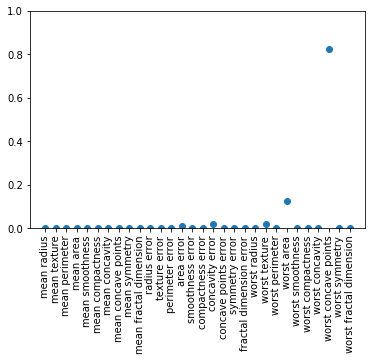

In [19]:
cancerX = list(range(len(cancer.feature_names)))  # Contando o numero de elementos do eixo x

plt.plot(tree_cancer.feature_importances_, 'o')   # Plotando o feture importances
plt.xticks(cancerX, featuresC, rotation=90)       # Inserindo rótulo
plt.ylim(0, 1);                                   # Limitando o eixo y de 0 a 1

## Titanic Dataset

**Carregando os dados**

In [20]:
titanic = pd.read_csv('titanic.csv')

titanic.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


**Pre-processando dos dados**

In [21]:
# Retirando as colunas que não contribuem para a classificação dos resultados
titanic = pd.DataFrame(titanic, columns=['PClass', 'Age', 'SexCode', 'Survived'])

In [22]:
# Verificando se há missing values
titanic.isnull().sum()

PClass        0
Age         557
SexCode       0
Survived      0
dtype: int64

Há 557 valores nulos na coluna de idade (age). Para amenizar esse problema, preencheremos tais valores com a média dos valores válidos.

In [23]:
# Preenchendo os valores nulos com a média
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

Para que o algoritmo funcione, necessitamos que todas as colunas possuam valores numéricos. A coluna PClass possui valores categóricos. Se simplesmente modificarmos os valores de 1st, 2st e 3st para 1, 2 e 3, o algoritmo pode interpretar erroneamente que há ordem nessa categoria, isso não é um problema nesse caso, mas em outros exemplos pode acarretar em uma resposta incorreta do algoritmo. Portanto, para utilizar uma abordagem geral, vamos transformar essa em colunas preenchidas com valores binários utilizando a função do pandas ``pd.get_dummies()``.

In [24]:
# Transformando os valores categóricos da coluna Class em valoer numéricos
titanic2 = pd.get_dummies(titanic)

titanic2.head()

,Age,SexCode,Survived,PClass_*,PClass_1st,PClass_2nd,PClass_3rd
0,29.00,1,1,0,1,0,0
1,2.00,1,0,0,1,0,0
2,30.00,0,0,0,1,0,0
3,25.00,1,0,0,1,0,0
4,0.92,0,1,0,1,0,0


In [25]:
# Dividindo entre feture e target e aplicando o feature selection
X_titanic = titanic2.drop(['Survived'], axis=1)
y_titanic = titanic2.Survived

**Treinando o modelo**

In [26]:
tree_titanic = DecisionTreeClassifier(max_depth=3)

tree_titanic.fit(X_titanic, y_titanic)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Verificando a acurácia**

In [27]:
tree_titanic.score(X_titanic, y_titanic)

0.8255902513328256

In [28]:
print(X_titanic[:0])
tree_titanic.feature_importances_

Empty DataFrame
Columns: [Age, SexCode, PClass_*, PClass_1st, PClass_2nd, PClass_3rd]
Index: []


array([0.08638642, 0.58800574, 0.        , 0.04941689, 0.0016498 ,
       0.27454116])

**Gerando o arqvuivo de visualização**

In [29]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = 'figuras/tree_titanic.dot'

features = list(X_titanic[:0]) # Gerando a lista de nome das features

export_graphviz(tree_titanic,
                out_file=arquivo,
                class_names=["survived", "not survived"],
                feature_names=features,
                impurity=False,
                filled=True)

# Convertendo o arquivo .dot para .png
!dot -Tpng figuras/tree_titanic.dot -o figuras/tree_titanic.png

**Visualisando a Decision Tree**

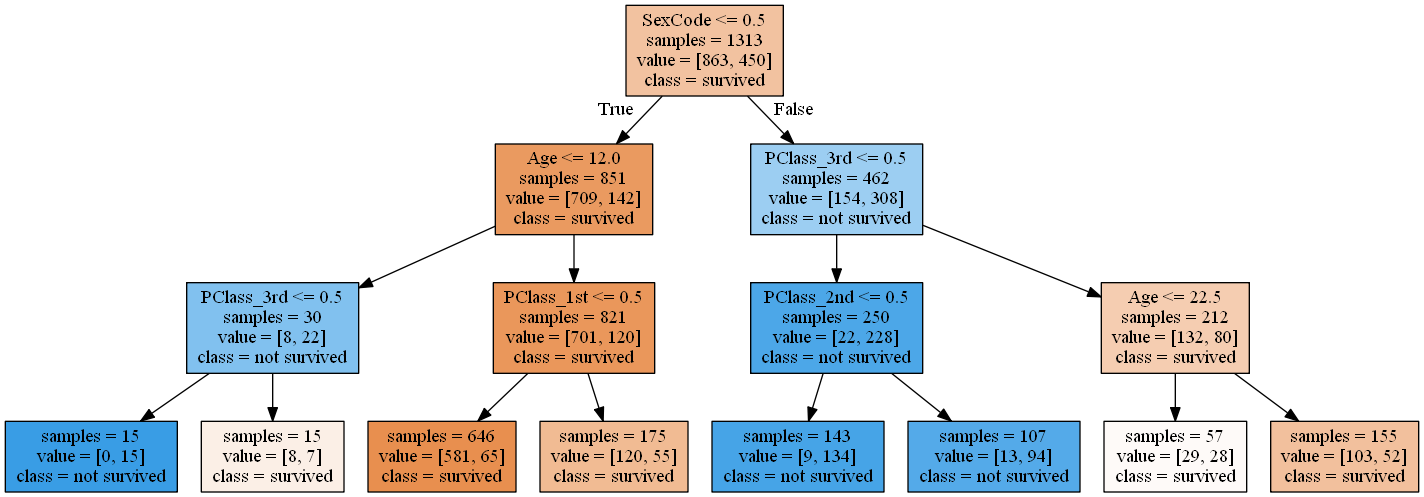

In [30]:
from IPython.display import Image
Image("figuras/tree_titanic.png")

**Importância dos atributos**

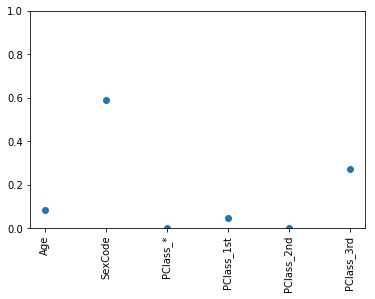

In [31]:
import matplotlib.pyplot as plt

eleX = list(range(X_titanic.shape[1]))  # Contando os elementos do eixo x

plt.plot(tree_titanic.feature_importances_, 'o')
plt.xticks(eleX, features, rotation='vertical')
plt.ylim(0, 1);

Podemos ver no gráfico acima que as variáveis mais determinantes para a classificação do algoritmo foram sexCode e PClass_3rd.